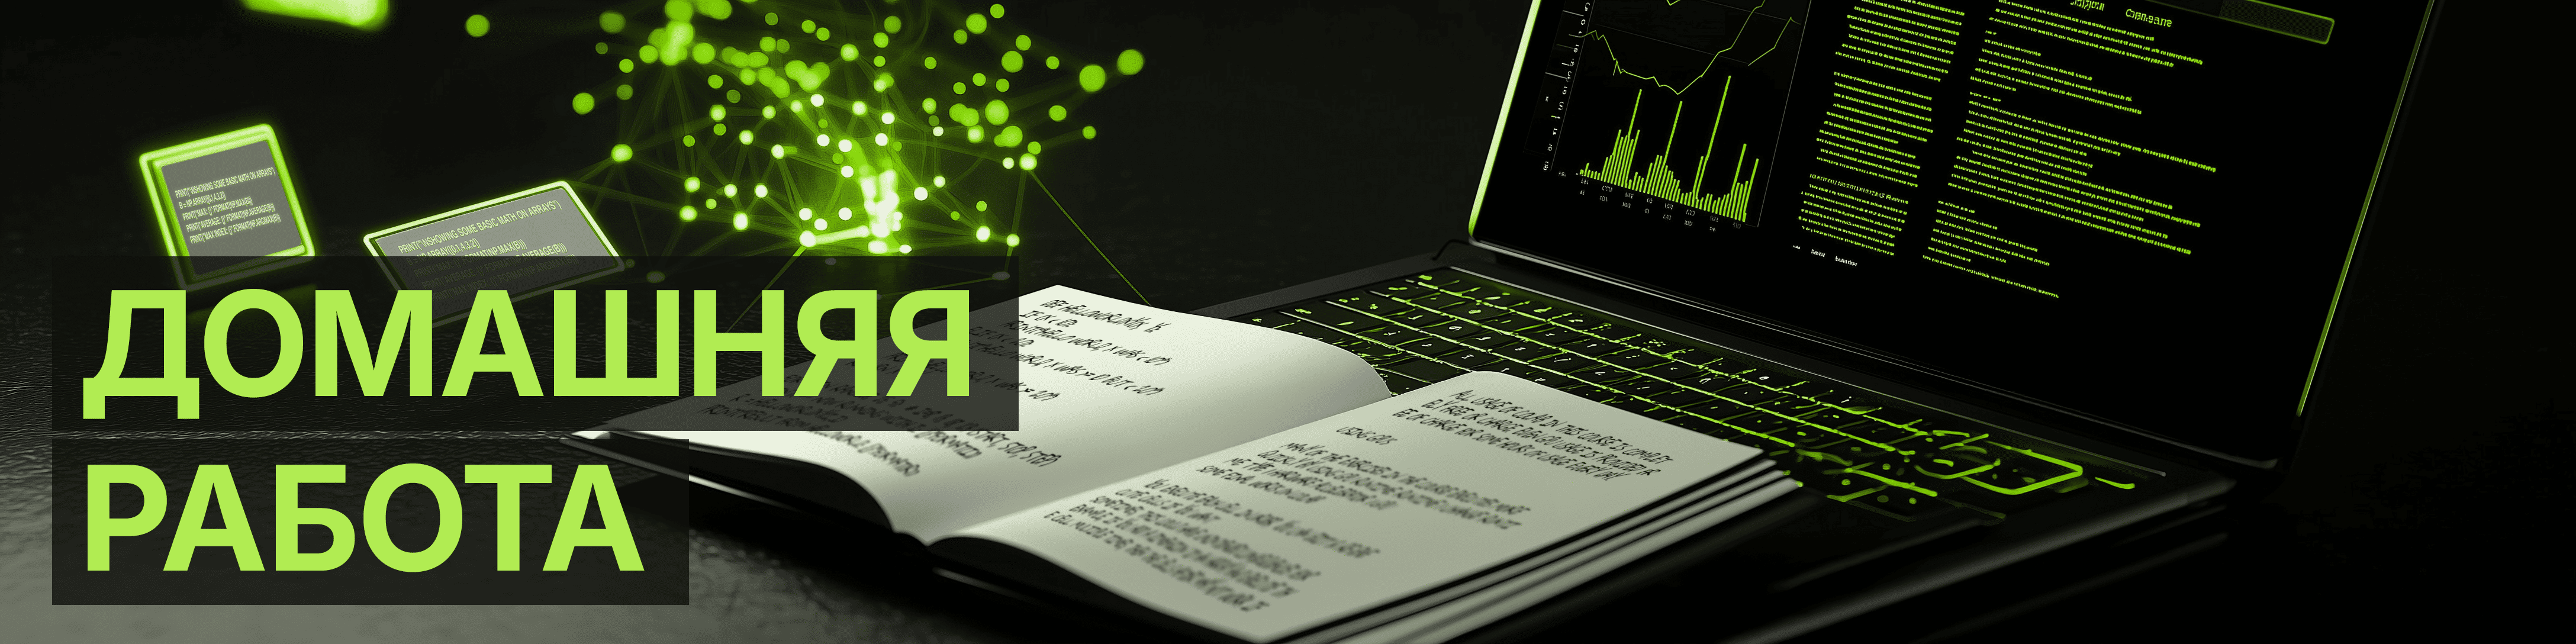

**Навигация по уроку**
1. [Кластеризация данных](https://colab.research.google.com/drive/1pGvEsnKLNQVMsjrN_bkHI_BnFCvPYLlH)
2. [Анализ кластеров](https://colab.research.google.com/drive/12BFMX7B01S-2CvTAcxbWXGvZ5ZAViQ1n)
3. [K-means кластеризация. Метрики и выбор числа кластеров](https://colab.research.google.com/drive/1Iz0nRUTCwNPleRxy1QHNEwTmeEntq2G0)
4. [Сегментация клиентов и текстовых данных](https://colab.research.google.com/drive/1Um2Kwi7CxcWO-s4YPRi837xt9OaJStI9)
5. Домашняя работа

В домашней работе вам необходимо выполнить одно из трёх заданий на выбор.

Во всех заданиях используется датасет [Mall_Customers](https://storage.yandexcloud.net/academy.ai/Mall_Customers.csv). Данный файл содержит информацию о клиентах: пол, возраст, доход, баллы покупателя (рейтинг, выставленный магазинами).

###**Задание 1. На 3 балла:**

1. Проведите k-means кластеризацию клиентов по признакам "Annual Income" и "Spending Score" с k=5. Визуализируйте результаты в виде scatter plot.
2. Используя метод локтя, определите оптимальное количество кластеров для признаков "Age" и "Spending Score". Постройте график метода локтя и определите оптимальное k.
3. Выполните кластеризацию клиентов на основе признаков `Age`, `Annual Income` и `Spending Score` с различным количеством кластеров. Сравните результаты и оцените, какой набор признаков дает более четкое разбиение на группы.
4. Исследуйте распределение мужчин и женщин (Gender) по полученным кластерам и визуализируйте результаты с помощью столбчатой диаграммы.

###**Задание 2. На 4 балла:**

1. Проведите сегментацию клиентов используя три признака одновременно ("Age", "Annual Income", "Spending Score"). Визуализируйте результаты в 3D.
2. Примените k-means++ и стандартный k-means с разными random_state. Сравните стабильность результатов через несколько запусков.
3. Проанализируйте выбросы в данных, удалите их и сравните результаты кластеризации до и после удаления выбросов.
4. Используйте метод силуэта для оценки качества кластеризации при разных k (от 2 до 8) и визуализируйте силуэтные коэффициенты.
5. Создайте новые признаки (например, отношение расходов к доходам) и проведите кластеризацию с включением этих признаков. Сравните с базовой моделью.

###**Задание 3. На 5 баллов:**

1. Загрузите датасет Mall_Customers.csv.
2. Исследуйте новые подходы к кластеризации, основанные на глубоком обучении (например, Deep Embedded Clustering).
3. Сравните их с традиционными методами кластеризации, такими как k-means.
4. Для сравнения используйте метрики.
5. Визуализируйте результаты для двух подходов для двух выбранных признаков.

# Импорты

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import regularizers

import ipywidgets as widgets
from IPython.display import display, clear_output

import time
import warnings
import random
warnings.filterwarnings('ignore')

# ==================== ФИКСАЦИЯ СИДОВ ====================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seed(42)

# Анализ датасета

In [38]:
# Настройки для лучшего отображения графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔍 Загрузка и анализ данных...")
!wget https://storage.yandexcloud.net/academy.ai/Mall_Customers.csv

# Загрузка данных
df = pd.read_csv('/content/Mall_Customers.csv')
print(f"📊 Размер датасета: {df.shape}")

# Просмотр первых строк
print("\n📋 Первые 5 строк данных:")
print(df.head())

# Основная информация о данных
print("\n📈 Информация о данных:")
print(df.info())

# Статистическое описание
print("\n📊 Статистическое описание:")
print(df.describe())

🔍 Загрузка и анализ данных...
--2025-11-18 09:48:19--  https://storage.yandexcloud.net/academy.ai/Mall_Customers.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/csv]
Saving to: ‘Mall_Customers.csv.4’

Mall_Customers.csv. 100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-11-18 09:48:19 (758 MB/s) - ‘Mall_Customers.csv.4’ saved [3981/3981]

📊 Размер датасета: (200, 5)

📋 Первые 5 строк данных:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           


📉 Визуализация распределения признаков...


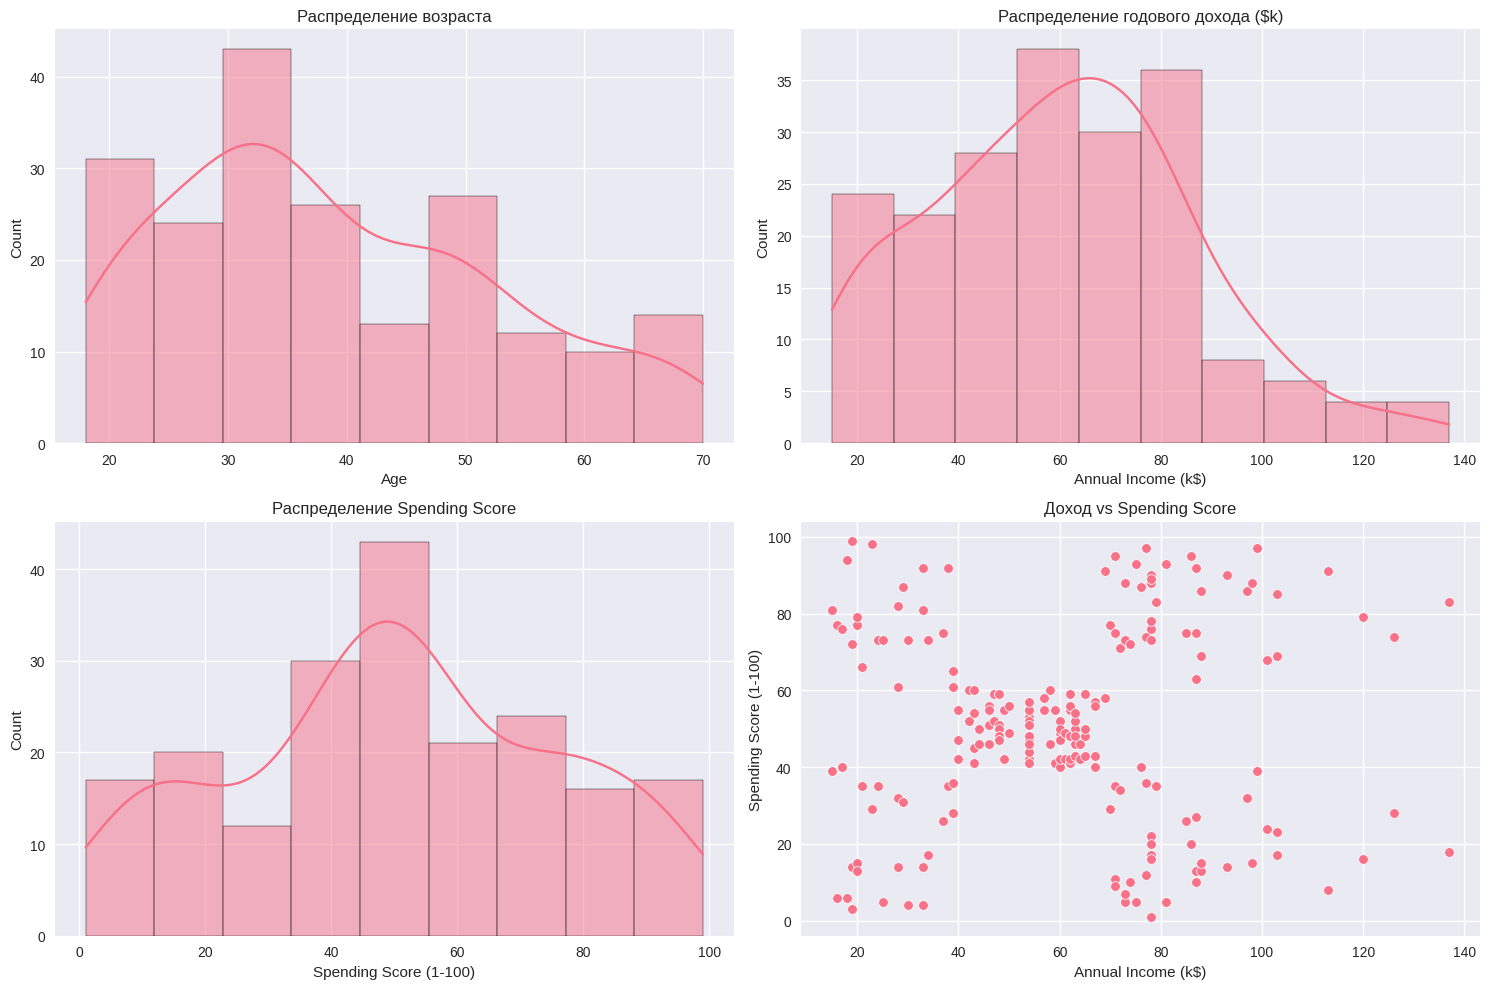

In [39]:
# Визуализация распределения признаков
print("\n📉 Визуализация распределения признаков...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Распределение возраста
sns.histplot(df['Age'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Распределение возраста')

# Распределение дохода
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Распределение годового дохода ($k)')

# Распределение spending score
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Распределение Spending Score')

# Scatter plot доход vs spending score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', ax=axes[1,1])
axes[1,1].set_title('Доход vs Spending Score')

plt.tight_layout()
plt.show()

In [40]:
print("⚙️ Подготовка данных...")

# Выбор признаков для кластеризации
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✅ Данные подготовлены. Размерность: {X_scaled.shape}")

⚙️ Подготовка данных...
✅ Данные подготовлены. Размерность: (200, 3)


# Глубокие методы кластеризации

Вот несколько подходящих методов, которые можно адаптировать:

**Автоэнкодеры (Autoencoders):** Это наиболее прямой и эффективный подход. Идея заключается в том, чтобы обучить автоэнкодер  реконструировать входные данные о клиентах. После обучения скрытое представление (он же выход энкодера) будет содержать сжатую, существенную информацию о каждом клиенте. Это представление уже является новым, более качественным набором признаков. На него затем можно применить классический алгоритм кластеризации, например, K-means. Это позволяет сочетать способность нейросетей к выделению сложных нелинейных зависимостей и эффективность традиционных методов кластеризации.

**Нейронные сети Кохонена (Self-Organizing Maps, SOM):** Этот тип нейронных сетей специально предназначен для задач кластеризации и визуализации данных без учителя. SOM проецируют многомерные данные (как наш датасет) на двумерную карту, сохраняя топологические отношения. На этой карте похожие клиенты будут находиться в соседних ячейках, что позволяет наглядно выделить кластеры.

In [41]:
# класс для логов
class ClusteringMetricsLogger(Callback):
    """Кастомный callback для логирования метрик кластеризации во время обучения"""
    def __init__(self, encoder_model, X_data, validation_data=None, log_interval=10):
        super().__init__()
        self.encoder = encoder_model
        self.X_data = X_data
        self.validation_data = validation_data
        self.log_interval = log_interval
        self.epoch_times = []
        self.losses = []
        self.val_losses = []
        self.silhouette_scores = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time.time() - self.epoch_start_time
        self.epoch_times.append(epoch_time)
        self.losses.append(logs.get('loss', 0))
        self.val_losses.append(logs.get('val_loss', 0))

        if epoch % self.log_interval == 0:
            latent_rep = self.encoder.predict(self.X_data, verbose=0)

            k_range = range(2, 11)
            best_k = 2
            best_silhouette = -1

            for k in k_range:
                kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
                clusters = kmeans.fit_predict(latent_rep)
                silhouette_avg = silhouette_score(latent_rep, clusters)

                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_k = k

            self.silhouette_scores.append(best_silhouette)

            print(f"📍 Эпоха {epoch+1}: Loss={logs.get('loss', 0):.4f}, "
                  f"ValLoss={logs.get('val_loss', 0):.4f}, "
                  f"BestK={best_k}, Silhouette={best_silhouette:.4f}")

## Архитектура
Для нашей задачи подойдет самый простой кодировщик с регуляризацией против переобучения

In [42]:
# создаем кодировщик
def create_simple_autoencoder(input_dim, latent_dim=2):
    """Упрощенный автоэнкодер для маленького датасета"""
    input_layer = tf.keras.layers.Input(shape=(input_dim,))

    # Минималистичный энкодер
    x = tf.keras.layers.Dense(8, activation='relu',
                             kernel_regularizer=regularizers.l2(0.01))(input_layer)
    x = tf.keras.layers.Dropout(0.3)(x)
    latent = tf.keras.layers.Dense(latent_dim, activation='linear',
                                  kernel_regularizer=regularizers.l2(0.01))(x)

    # Минималистичный декодер
    x = tf.keras.layers.Dense(8, activation='relu',
                             kernel_regularizer=regularizers.l2(0.01))(latent)
    x = tf.keras.layers.Dropout(0.3)(x)
    output_layer = tf.keras.layers.Dense(input_dim, activation='linear')(x)

    encoder = tf.keras.Model(input_layer, latent, name='encoder')
    autoencoder = tf.keras.Model(input_layer, output_layer, name='autoencoder')

    return encoder, autoencoder

## Вспомогательные функции

In [43]:
#@title stable_clustering
# отбираем по нескольким запускам лучшие показатели
def stable_clustering(latent_representations, n_clusters, n_runs=10, method='kmeans'):
    """Стабильная кластеризация с усреднением нескольких запусков"""
    best_score = -1
    best_clusters = None
    best_model = None

    # Многократный запуск кластеризации для повышения стабильности
    for i in range(n_runs):
        # Выбор алгоритма кластеризации с разными random_state для разнообразия
        if method == 'kmeans':
            # K-means с фиксированным random_state для воспроизводимости
            model = KMeans(n_clusters=n_clusters, random_state=42+i, n_init=1)
        elif method == 'gmm':
            # Gaussian Mixture Model как альтернативный метод
            model = GaussianMixture(n_components=n_clusters, random_state=42+i)
        else:
            raise ValueError("Метод должен быть 'kmeans' или 'gmm'")

        # Обучение и предсказание в зависимости от метода
        if method == 'kmeans':
            # K-means: прямое предсказание кластеров
            clusters = model.fit_predict(latent_representations)
            # Оценка качества кластеризации
            score = silhouette_score(latent_representations, clusters)
        else:
            # GMM: сначала обучение, затем предсказание
            model.fit(latent_representations)
            clusters = model.predict(latent_representations)
            score = silhouette_score(latent_representations, clusters)

        # Обновление лучшего результата если текущий лучше
        if score > best_score:
            best_score = score          # Сохраняем лучший silhouette score
            best_clusters = clusters    # Сохраняем лучшие метки кластеров
            best_model = model          # Сохраняем лучшую модель

    return best_clusters, best_score, best_model

**Задача** `stable_clustering`**:**

Обеспечить стабильность и воспроизводимость кластеризации путем многократного запуска алгоритма и выбора варианта с наивысшим silhouette score. Это решает проблему случайной инициализации в кластеризации, гарантирует наилучшее возможное качество для данного количества кластеров и обеспечивает воспроизводимость результатов между запусками.

Функция особенно полезна при работе с нейронными сетями, где латентные представления могут немного меняться между эпохами обучения.

---

In [44]:
#@title smart_k_analysis
# выбор лучших K
def smart_k_analysis(latent_representations, max_k=8):
    """
    Умный анализ оптимального K с ограничениями для маленьких датасетов
    """
    k_range = range(2, min(max_k + 1, 8))  # Ограничиваем максимальное K

    silhouette_scores = []
    inertia_values = []
    calinski_scores = []
    davies_scores = []

    for k in k_range:
        # Используем стабильную кластеризацию
        clusters, silhouette, _ = stable_clustering(latent_representations, k, n_runs=5)
        silhouette_scores.append(silhouette)

        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(latent_representations)
        inertia_values.append(kmeans.inertia_)

        calinski_scores.append(calinski_harabasz_score(latent_representations, clusters))
        davies_scores.append(davies_bouldin_score(latent_representations, clusters))

    # Находим разумные кандидаты для K
    candidates = []

    # 1. Глобальный максимум silhouette (если он разумен)
    global_max_idx = np.argmax(silhouette_scores)
    global_max_k = k_range[global_max_idx]
    if silhouette_scores[global_max_idx] > 0.4:  # Минимальный порог качества
        candidates.append(global_max_k)

    # 2. Локальные максимумы silhouette
    for i in range(1, len(silhouette_scores) - 1):
        if (silhouette_scores[i] > silhouette_scores[i-1] and
            silhouette_scores[i] > silhouette_scores[i+1] and
            silhouette_scores[i] > 0.4):  # Порог качества
            candidates.append(k_range[i])

    # 3. "Локоть" на графике inertia
    if len(inertia_values) > 3:
        # Вычисляем вторые разности для нахождения "локтя"
        second_diff = np.diff(np.diff(inertia_values))
        if len(second_diff) > 0:
            elbow_idx = np.argmax(second_diff) + 1  # +1 потому что diff уменьшает размер
            if elbow_idx < len(k_range):
                candidates.append(k_range[elbow_idx])

    # Убираем дубликаты и сортируем
    candidates = sorted(list(set(candidates)))

    # Если кандидатов нет, берем K с лучшим silhouette
    if not candidates and len(silhouette_scores) > 0:
        candidates = [k_range[np.argmax(silhouette_scores)]]

    # Ограничиваем максимальное количество кандидатов
    candidates = candidates[:3]

    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # График силуэта
    axes[0,0].plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
    axes[0,0].set_xlabel('Число кластеров')
    axes[0,0].set_ylabel('Silhouette Score')
    axes[0,0].set_title('Метод силуэта')
    axes[0,0].grid(True, alpha=0.3)

    for candidate in candidates:
        idx = list(k_range).index(candidate)
        axes[0,0].axvline(x=candidate, color='red', linestyle='--', alpha=0.7)
        axes[0,0].text(candidate, silhouette_scores[idx] + 0.01,
                      f'K={candidate}', ha='center', color='red')

    # Метод локтя
    axes[0,1].plot(k_range, inertia_values, 'ro-', linewidth=2, markersize=8)
    axes[0,1].set_xlabel('Число кластеров')
    axes[0,1].set_ylabel('Inertia')
    axes[0,1].set_title('Метод локтя')
    axes[0,1].grid(True, alpha=0.3)

    # Calinski-Harabasz (чем выше - тем лучше)
    axes[1,0].plot(k_range, calinski_scores, 'go-', linewidth=2, markersize=8)
    axes[1,0].set_xlabel('Число кластеров')
    axes[1,0].set_ylabel('Calinski-Harabasz Score')
    axes[1,0].set_title('Calinski-Harabasz Index\n(чем ВЫШЕ - тем лучше)')
    axes[1,0].grid(True, alpha=0.3)

    # Davies-Bouldin (чем ниже - тем лучше)
    axes[1,1].plot(k_range, davies_scores, 'mo-', linewidth=2, markersize=8)
    axes[1,1].set_xlabel('Число кластеров')
    axes[1,1].set_ylabel('Davies-Bouldin Score')
    axes[1,1].set_title('Davies-Bouldin Index\n(чем НИЖЕ - тем лучше)')
    axes[1,1].grid(True, alpha=0.3)


    plt.tight_layout()
    plt.show()

    print("🎯 РЕКОМЕНДОВАННЫЕ КАНДИДАТЫ ДЛЯ K:")
    for candidate in candidates:
        idx = list(k_range).index(candidate)
        print(f"   • K={candidate}: Silhouette={silhouette_scores[idx]:.4f}, "
              f"Calinski={calinski_scores[idx]:.2f}, Davies={davies_scores[idx]:.4f}")

    return candidates, silhouette_scores, inertia_values

Функция `smart_k_analysis` выполняет автоматизированный подбор оптимального числа кластеров (K) для алгоритма K-means, комбинируя несколько метрик качества.

Основные этапы:

1. Вычисляет 4 метрики для K от 2 до 8:

- Silhouette Score

- Inertia (метод локтя)

- Calinski-Harabasz Index

- Davies-Bouldin Index

2. Выбирает кандидатов для K тремя способами:

- Глобальный максимум Silhouette

- Локальные максимумы Silhouette

- Точка излома на графике Inertia

3. Фильтрует результаты:

- Убирает дубликаты

- Применяет порог качества (Silhouette > 0.4)

- Ограничивает 3 лучшими кандидатами

4. Визуализирует все метрики с отметками кандидатов и выводит итоговые рекомендации.

**Возвращает:** список рекомендованных значений K, значения Silhouette и Inertia для анализа.


---

In [45]:
#@title compare_with_pca
# сравнение с PCA
def compare_with_pca(X_scaled, latent_representations, max_k=6):
    """
    Сравнение кластеризации на латентных представлениях и PCA
    """
    # PCA для сравнения
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X_scaled)

    print("🔍 СРАВНЕНИЕ С PCA:")
    print("=" * 50)

    # Кластеризация на PCA компонентах
    k_range = range(2, min(max_k + 1, 7))

    print("\n📊 РЕЗУЛЬТАТЫ НА PCA КОМПОНЕНТАХ:")
    pca_silhouettes = []
    for k in k_range:
        kmeans_pca = KMeans(n_clusters=k, random_state=42)
        clusters_pca = kmeans_pca.fit_predict(pca_components)
        silhouette_pca = silhouette_score(pca_components, clusters_pca)
        pca_silhouettes.append(silhouette_pca)
        print(f"   K={k}: Silhouette={silhouette_pca:.4f}")

    # Кластеризация на латентных представлениях
    print("\n📊 РЕЗУЛЬТАТЫ НА ЛАТЕНТНЫХ ПРЕДСТАВЛЕНИЯХ:")
    latent_silhouettes = []
    for k in k_range:
        clusters_latent, silhouette_latent, _ = stable_clustering(latent_representations, k)
        latent_silhouettes.append(silhouette_latent)
        print(f"   K={k}: Silhouette={silhouette_latent:.4f}")

    # Визуализация сравнения
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.7)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA Components')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.scatter(latent_representations[:, 0], latent_representations[:, 1], alpha=0.7)
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title('Latent Representations')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # График сравнения silhouette
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, pca_silhouettes, 'bo-', label='PCA', linewidth=2, markersize=8)
    plt.plot(k_range, latent_silhouettes, 'ro-', label='Autoencoder', linewidth=2, markersize=8)
    plt.xlabel('Число кластеров')
    plt.ylabel('Silhouette Score')
    plt.title('Сравнение качества кластеризации: PCA vs Autoencoder')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Рекомендация
    best_pca_k = k_range[np.argmax(pca_silhouettes)]
    best_latent_k = k_range[np.argmax(latent_silhouettes)]

    print(f"\n🎯 РЕКОМЕНДАЦИИ:")
    print(f"   • Лучший K для PCA: {best_pca_k} (Silhouette={max(pca_silhouettes):.4f})")
    print(f"   • Лучший K для Autoencoder: {best_latent_k} (Silhouette={max(latent_silhouettes):.4f})")

    if max(latent_silhouettes) > max(pca_silhouettes) + 0.05:
        print("   ✅ Autoencoder показывает значительно лучшие результаты")
    elif max(pca_silhouettes) > max(latent_silhouettes) + 0.05:
        print("   ✅ PCA показывает значительно лучшие результаты")
    else:
        print("   ⚖️ Оба метода показывают схожие результаты")

Функция `compare_with_pca` сравнивает эффективность кластеризации на латентных представлениях автоэнкодера и PCA-компонентах.

**Почему сравнивается с PCA:**

PCA (Principal Component Analysis) используется как базовый эталон для сравнения, потому что это:

1. Классический метод снижения размерности

2. Простой и интерпретируемый линейный метод

3. Широко принятый бенчмарк в машинном обучении

4. Бесплатный ориентир - если автоэнкодер не превосходит PCA, его сложность не оправдана

PCA это:

- Линейное преобразование данных

- Находит новые оси (главные компоненты), которые:

    - Ортогональны друг другу

    - Направлены в сторону максимальной дисперсии данных

- Сохраняет глобальную структуру, но может терять нелинейные зависимости

Смысл сравнения:
Проверить, дает ли сложный нелинейный автоэнкодер значимое улучшение над простым линейным PCA для конкретной задачи кластеризации. Если разница минимальна - возможно, проще использовать PCA.

---

In [46]:
#@title visualizations
# функция визуализации результатов
def create_clustering_visualizations(df, latent_representations, clusters, n_clusters, features):
    """
    Создает все визуализации для конкретного количества кластеров
    """
    fig = plt.figure(figsize=(20, 16))

    # 1. Кластеры в латентном пространстве
    plt.subplot(3, 3, 1)
    scatter = plt.scatter(latent_representations[:, 0], latent_representations[:, 1],
                         c=clusters, cmap='viridis', alpha=0.8, s=70)
    plt.colorbar(scatter)
    plt.xlabel('Латентная ось 1')
    plt.ylabel('Латентная ось 2')
    plt.title(f'Латентное пространство\n({n_clusters} кластеров)')
    plt.grid(True, alpha=0.3)

    # 2. Доход vs Spending Score
    plt.subplot(3, 3, 2)
    scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                         c=clusters, cmap='viridis', alpha=0.8, s=70)
    plt.colorbar(scatter)
    plt.xlabel('Годовой доход ($k)')
    plt.ylabel('Spending Score')
    plt.title('Доход vs Spending Score')
    plt.grid(True, alpha=0.3)

    # 3. Возраст vs Spending Score
    plt.subplot(3, 3, 3)
    scatter = plt.scatter(df['Age'], df['Spending Score (1-100)'],
                         c=clusters, cmap='viridis', alpha=0.8, s=70)
    plt.colorbar(scatter)
    plt.xlabel('Возраст')
    plt.ylabel('Spending Score')
    plt.title('Возраст vs Spending Score')
    plt.grid(True, alpha=0.3)

    # 4. Распределение возраста по кластерам
    plt.subplot(3, 3, 4)
    df_temp = df.copy()
    df_temp['Cluster'] = clusters
    sns.boxplot(data=df_temp, x='Cluster', y='Age', palette='viridis')
    plt.title('Распределение возраста')
    plt.xticks(rotation=45)

    # 5. Распределение дохода по кластерам
    plt.subplot(3, 3, 5)
    sns.boxplot(data=df_temp, x='Cluster', y='Annual Income (k$)', palette='viridis')
    plt.title('Распределение дохода')
    plt.xticks(rotation=45)

    # 6. Распределение Spending Score по кластерам
    plt.subplot(3, 3, 6)
    sns.boxplot(data=df_temp, x='Cluster', y='Spending Score (1-100)', palette='viridis')
    plt.title('Распределение Spending Score')
    plt.xticks(rotation=45)

    # 7. Размеры кластеров
    plt.subplot(3, 3, 7)
    cluster_sizes = df_temp['Cluster'].value_counts().sort_index()
    colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
    bars = plt.bar(range(len(cluster_sizes)), cluster_sizes.values, color=colors)
    plt.xlabel('Кластер')
    plt.ylabel('Количество клиентов')
    plt.title('Размеры кластеров')
    plt.xticks(range(len(cluster_sizes)), cluster_sizes.index)

    # Добавляем подписи на столбцы
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontsize=9)

    # 8. Heatmap средних значений по кластерам
    plt.subplot(3, 3, 8)
    cluster_means = df_temp.groupby('Cluster')[features].mean()
    sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt='.1f',
                cbar_kws={'label': 'Среднее значение'})
    plt.title('Средние значения по кластерам')
    plt.ylabel('Признаки')
    plt.xlabel('Кластеры')

    # 9. Дополнительная статистика по кластерам
    plt.subplot(3, 3, 9)
    # Показываем основные статистики по кластерам
    cluster_summary = df_temp.groupby('Cluster')[features].agg(['mean', 'std']).round(1)
    summary_text = "СТАТИСТИКА КЛАСТЕРОВ:\n\n"
    for cluster in range(n_clusters):
        summary_text += f"Кластер {cluster}:\n"
        for feature in features:
            mean_val = cluster_summary.loc[cluster, (feature, 'mean')]
            std_val = cluster_summary.loc[cluster, (feature, 'std')]
            summary_text += f"  {feature}: {mean_val}±{std_val}\n"
        summary_text += "\n"

    plt.text(0.5, 0.5, summary_text, ha='center', va='center',
            transform=plt.gca().transAxes, fontsize=9, family='monospace')
    plt.axis('off')

    plt.tight_layout()
    return fig

---

In [47]:
#@title cluster_analysis
# анализ кластеризации
def create_cluster_analysis(df, clusters, n_clusters, features, silhouette, calinski, davies):
    """
    Создает детальный текстовый анализ кластеров
    """
    df_temp = df.copy()
    df_temp['Cluster'] = clusters

    # Метрики качества
    print("🎯 МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ:")
    print("=" * 50)
    print(f"• Silhouette Score: {silhouette:.4f}")
    print(f"• Calinski-Harabasz Index: {calinski:.2f}")
    print(f"• Davies-Bouldin Index: {davies:.4f}")
    print()

    # Оценка качества
    quality_assessment = []
    if silhouette > 0.5:
        quality_assessment.append("✅ Отличное качество кластеризации")
    elif silhouette > 0.4:
        quality_assessment.append("⚠️ Хорошее качество кластеризации")
    elif silhouette > 0.3:
        quality_assessment.append("⚠️ Умеренное качество кластеризации")
    else:
        quality_assessment.append("❌ Низкое качество кластеризации")

    if calinski > 200:
        quality_assessment.append("✅ Кластеры хорошо разделены")
    elif calinski > 100:
        quality_assessment.append("⚠️ Умеренное разделение кластеров")
    else:
        quality_assessment.append("❌ Слабое разделение кластеров")

    if davies < 0.6:
        quality_assessment.append("✅ Компактные и плотные кластеры")
    elif davies < 0.8:
        quality_assessment.append("⚠️ Умеренная компактность кластеров")
    else:
        quality_assessment.append("❌ Низкая компактность кластеров")

    print("📊 ОЦЕНКА КАЧЕСТВА:")
    for assessment in quality_assessment:
        print(f"  {assessment}")
    print()

    # Статистика по кластерам
    print("👥 СТАТИСТИКА ПО КЛАСТЕРАМ:")
    print("=" * 50)
    cluster_sizes = df_temp['Cluster'].value_counts().sort_index()

    for cluster in range(n_clusters):
        cluster_data = df_temp[df_temp['Cluster'] == cluster]
        size = len(cluster_data)
        percentage = (size / len(df_temp)) * 100

        print(f"\n🏷️ КЛАСТЕР {cluster}:")
        print(f"   📊 Размер: {size} клиентов ({percentage:.1f}%)")
        print(f"   📈 Характеристики:")

        for feature in features:
            mean_val = cluster_data[feature].mean()
            std_val = cluster_data[feature].std()
            print(f"      • {feature}: {mean_val:.1f} ± {std_val:.1f}")

        if 'Gender' in cluster_data.columns:
            gender_pct = cluster_data['Gender'].value_counts(normalize=True) * 100
            print(f"   👫 Распределение по полу:")
            for gender, pct in gender_pct.items():
                count = (cluster_data['Gender'] == gender).sum()
                print(f"      • {gender}: {count} клиентов ({pct:.1f}%)")


---

In [48]:
#@title clustering_dashboard
# создает дашборд для вкладок с несколькими графиками
def create_interactive_clustering_dashboard(df, results, latent_representations, features=None):
    """
    Создает интерактивную панель с вкладками для каждого количества кластеров
    """
    if features is None:
        features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

    # Создаем вкладки для каждого количества кластеров
    tab_titles = [f'{k} кластеров' for k in results.keys()]
    tabs = widgets.Tab()

    # Создаем содержимое для каждой вкладки
    children = []

    for k in results.keys():
        # Создаем выход для графиков
        plot_output = widgets.Output()

        # Создаем выход для текстового анализа
        text_output = widgets.Output()

        # Вертикальное расположение: сначала графики, потом текст
        tab_content = widgets.VBox([
            widgets.Label(value=f'📊 ВИЗУАЛИЗАЦИЯ ДЛЯ {k} КЛАСТЕРОВ', style={'font_weight': 'bold'}),
            plot_output,
            widgets.HTML(value="<hr style='margin: 20px 0;'>"),
            widgets.Label(value='📈 АНАЛИТИКА КЛАСТЕРОВ', style={'font_weight': 'bold'}),
            text_output
        ])

        children.append(tab_content)

        # Заполняем графики
        with plot_output:
            fig = create_clustering_visualizations(df, latent_representations,
                                                 results[k]['clusters'], k, features)
            plt.show()

        # Заполняем текстовый анализ
        with text_output:
            create_cluster_analysis(df, results[k]['clusters'], k, features,
                                  results[k]['silhouette'], results[k]['calinski'],
                                  results[k]['davies'])

    tabs.children = children
    for i, title in enumerate(tab_titles):
        tabs.set_title(i, title)

    # Добавляем общую информацию
    header = widgets.HTML(
        value=f"<h2>🎯 ИНТЕРАКТИВНАЯ ПАНЕЛЬ КЛАСТЕРИЗАЦИИ</h2>"
              f"<p>Всего клиентов: <b>{len(df)}</b> | Анализируется: <b>{len(results)}</b> вариантов кластеризации</p>"
              f"<hr>"
    )

    dashboard = widgets.VBox([header, tabs])
    display(dashboard)

---

In [49]:
#@title main pipeline
# основной пайплайн
def improved_deep_clustering_with_dashboard(df, features=None, epochs=100, latent_dim=2):
    """Улучшенный пайплайн с интерактивным дашбордом"""
    if features is None:
        features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

    print("🚀 ЗАПУСК УЛУЧШЕННОЙ КЛАСТЕРИЗАЦИИ С ДАШБОРДОМ")
    print("=" * 60)

    # Подготовка данных
    X = df[features].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Создание упрощенного автоэнкодера
    encoder, autoencoder = create_simple_autoencoder(X_scaled.shape[1], latent_dim)

    # Компиляция
    autoencoder.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse'
    )

    # Ранняя остановка
    early_stopping = EarlyStopping(
        monitor='loss',
        patience=15,
        restore_best_weights=True,
        min_delta=0.001,
        verbose=0
    )

    print("\n🧠 ОБУЧЕНИЕ АВТОЭНКОДЕРА...")
    history = autoencoder.fit(
        X_scaled, X_scaled,
        epochs=epochs,
        batch_size=8,
        verbose=0,
        validation_split=0.2,
        callbacks=[early_stopping]
    )

    # Получение латентных представлений
    latent_representations = encoder.predict(X_scaled, verbose=0)

    print("\n🔍 АНАЛИЗ ОПТИМАЛЬНОГО ЧИСЛА КЛАСТЕРОВ...")
    candidates, silhouette_scores, inertia_values = smart_k_analysis(latent_representations, max_k=6)

    results = {}

    print("\n🚀 ЗАПУСК КЛАСТЕРИЗАЦИИ ДЛЯ РЕКОМЕНДОВАННЫХ K...")
    for k in candidates:
        print(f"📊 Кластеризация для K={k}...")

        clusters, silhouette, model = stable_clustering(latent_representations, k, n_runs=10)

        # Сохранение результатов
        results[k] = {
            'clusters': clusters,
            'silhouette': silhouette,
            'calinski': calinski_harabasz_score(latent_representations, clusters),
            'davies': davies_bouldin_score(latent_representations, clusters),
            'model': model
        }

        # Сохранение в CSV
        df_temp = df.copy()
        df_temp['Cluster'] = clusters
        df_temp['Latent_1'] = latent_representations[:, 0]
        if latent_representations.shape[1] > 1:
            df_temp['Latent_2'] = latent_representations[:, 1]
        df_temp.to_csv(f'/content/clustering_k_{k}.csv', index=False)

    # Создание интерактивного дашборда
    print("\n🎨 СОЗДАНИЕ ИНТЕРАКТИВНОГО ДАШБОРДА...")
    create_interactive_clustering_dashboard(df, results, latent_representations, features)

    return results, latent_representations, encoder, autoencoder

## Выполнение кластеризации

🚀 ЗАПУСК УЛУЧШЕННОЙ КЛАСТЕРИЗАЦИИ С ДАШБОРДОМ

🧠 ОБУЧЕНИЕ АВТОЭНКОДЕРА...



🔍 АНАЛИЗ ОПТИМАЛЬНОГО ЧИСЛА КЛАСТЕРОВ...


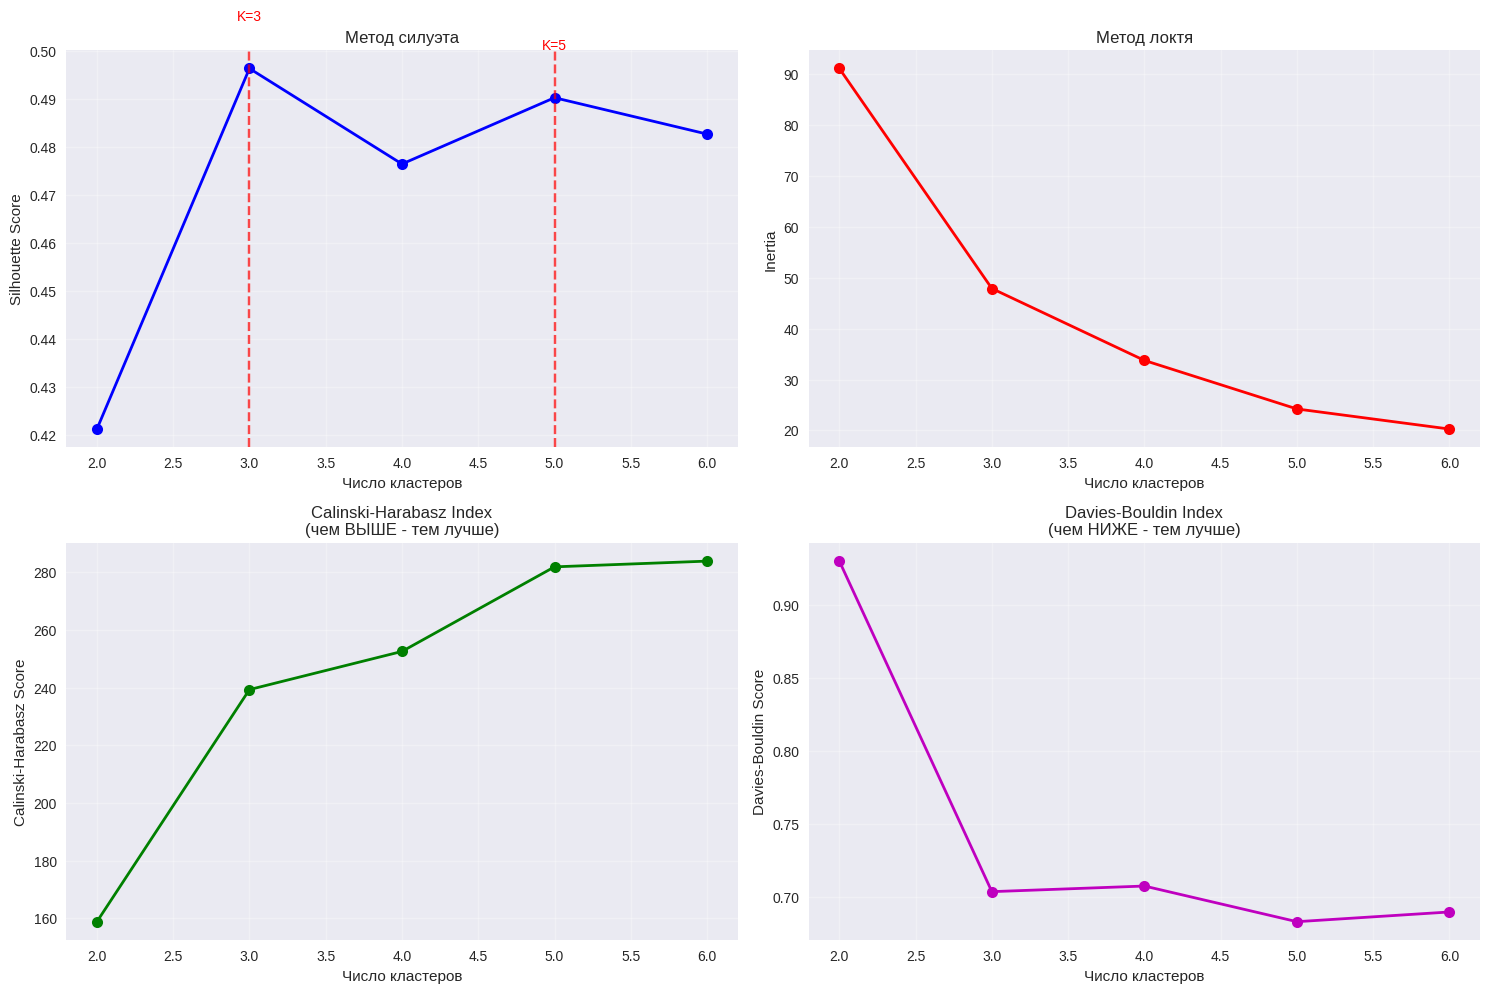

🎯 РЕКОМЕНДОВАННЫЕ КАНДИДАТЫ ДЛЯ K:
   • K=3: Silhouette=0.4964, Calinski=239.34, Davies=0.7039
   • K=5: Silhouette=0.4903, Calinski=281.90, Davies=0.6833

🚀 ЗАПУСК КЛАСТЕРИЗАЦИИ ДЛЯ РЕКОМЕНДОВАННЫХ K...
📊 Кластеризация для K=3...
📊 Кластеризация для K=5...

🎨 СОЗДАНИЕ ИНТЕРАКТИВНОГО ДАШБОРДА...


In [50]:
results, latent_rep, encoder_model, autoencoder_model = improved_deep_clustering_with_dashboard(
    df,
    epochs=80,
    latent_dim=2
)

# Классический K-mean

In [51]:
#@title kmeans
# функция расчета лучшего K и разбиение на кластеры
def kmeans_clustering_analysis(df, features=None, max_k=8, random_state=42):
    """
    Полный анализ кластеризации K-means с метриками и визуализацией
    """
    print("🔍 ЗАГРУЗКА И АНАЛИЗ ДАННЫХ")
    print("=" * 60)

    if features is None:
        features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

    # Подготовка данных
    X = df[features].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"📊 Используемые признаки: {features}")
    print(f"🔢 Размерность данных: {X_scaled.shape}")

    # Метод локтя для определения оптимального K
    print("\n📈 ПОДБОР ОПТИМАЛЬНОГО ЧИСЛА КЛАСТЕРОВ...")
    inertia = []
    silhouette_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        clusters = kmeans.fit_predict(X_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, clusters))

    # Визуализация метода локтя и silhouette score
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Метод локтя
    axes[0].plot(k_range, inertia, 'bo-')
    axes[0].set_xlabel('Число кластеров')
    axes[0].set_ylabel('Inertia')
    axes[0].set_title('Метод локтя')
    axes[0].grid(True)

    # Silhouette score
    axes[1].plot(k_range, silhouette_scores, 'ro-')
    axes[1].set_xlabel('Число кластеров')
    axes[1].set_ylabel('Silhouette Score')
    axes[1].set_title('Silhouette Score')
    axes[1].grid(True)

    # Находим оптимальное K (по максимальному silhouette score)
    optimal_k = k_range[np.argmax(silhouette_scores)]

    # Calinski-Harabasz для разных K
    ch_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        clusters = kmeans.fit_predict(X_scaled)
        ch_scores.append(calinski_harabasz_score(X_scaled, clusters))

    axes[2].plot(k_range, ch_scores, 'go-')
    axes[2].set_xlabel('Число кластеров')
    axes[2].set_ylabel('Calinski-Harabasz Score')
    axes[2].set_title('Calinski-Harabasz Score')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

    print(f"🎯 Рекомендуемое число кластеров: {optimal_k}")

    # Финальная кластеризация с оптимальным K
    print(f"\n🚀 ЗАПУСК K-MEANS С {optimal_k} КЛАСТЕРАМИ...")
    final_kmeans = KMeans(n_clusters=optimal_k, random_state=random_state, n_init=10)
    final_clusters = final_kmeans.fit_predict(X_scaled)

    # Вычисление метрик
    silhouette_avg = silhouette_score(X_scaled, final_clusters)
    calinski_harabasz = calinski_harabasz_score(X_scaled, final_clusters)
    davies_bouldin = davies_bouldin_score(X_scaled, final_clusters)

    # Добавляем кластеры в DataFrame
    df_kmeans = df.copy()
    df_kmeans['Cluster'] = final_clusters

    # Визуализация результатов
    print("\n🎨 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ...")
    visualize_kmeans_results(df_kmeans, X_scaled, final_clusters, optimal_k, features)

    # Анализ кластеров
    print("\n📊 АНАЛИЗ КЛАСТЕРОВ...")
    analyze_kmeans_clusters(df_kmeans, optimal_k, features,
                           silhouette_avg, calinski_harabasz, davies_bouldin)

    return df_kmeans, final_kmeans, silhouette_avg, calinski_harabasz, davies_bouldin, optimal_k


---

In [52]:
#@title visualize_kmeans
# графики результатов
def visualize_kmeans_results(df, X_scaled, clusters, optimal_k, features):
    """
    Визуализация результатов K-means кластеризации
    """
    fig = plt.figure(figsize=(20, 15))

    # 1. Кластеры в пространстве признаков (первые 2 признака)
    plt.subplot(2, 3, 1)
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
                         cmap='viridis', alpha=0.7, s=60)
    plt.colorbar(scatter)
    plt.xlabel(f'{features[0]} (scaled)')
    plt.ylabel(f'{features[1]} (scaled)')
    plt.title('K-means: Кластеры в масштабированном пространстве')

    # 2. Кластеры в исходном пространстве (доход vs spending score)
    plt.subplot(2, 3, 2)
    if 'Annual Income (k$)' in df.columns and 'Spending Score (1-100)' in df.columns:
        scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                             c=clusters, cmap='viridis', alpha=0.7, s=60)
        plt.colorbar(scatter)
        plt.xlabel('Годовой доход ($k)')
        plt.ylabel('Spending Score')
        plt.title('Кластеры: Доход vs Spending Score')

    # 3. Кластеры в исходном пространстве (возраст vs spending score)
    plt.subplot(2, 3, 3)
    if 'Age' in df.columns and 'Spending Score (1-100)' in df.columns:
        scatter = plt.scatter(df['Age'], df['Spending Score (1-100)'],
                             c=clusters, cmap='viridis', alpha=0.7, s=60)
        plt.colorbar(scatter)
        plt.xlabel('Возраст')
        plt.ylabel('Spending Score')
        plt.title('Кластеры: Возраст vs Spending Score')

    # 4. Распределение кластеров по возрасту
    plt.subplot(2, 3, 4)
    sns.boxplot(data=df, x='Cluster', y='Age')
    plt.title('Распределение возраста по кластерам')

    # 5. Распределение кластеров по доходу
    plt.subplot(2, 3, 5)
    if 'Annual Income (k$)' in df.columns:
        sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)')
        plt.title('Распределение дохода по кластерам')

    # 6. Распределение кластеров по spending score
    plt.subplot(2, 3, 6)
    if 'Spending Score (1-100)' in df.columns:
        sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)')
        plt.title('Распределение Spending Score по кластерам')

    plt.tight_layout()
    plt.show()

    # Дополнительная визуализация - размеры кластеров
    plt.figure(figsize=(10, 6))
    cluster_sizes = df['Cluster'].value_counts().sort_index()
    colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))
    bars = plt.bar(cluster_sizes.index, cluster_sizes.values, color=colors)
    plt.xlabel('Кластер')
    plt.ylabel('Количество клиентов')
    plt.title('Размеры кластеров K-means')

    # Добавляем подписи на столбцы
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)} ({height/len(df)*100:.1f}%)',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

---

In [53]:
#@title analyze_kmeans
# анализ кластеров
def analyze_kmeans_clusters(df, optimal_k, features, silhouette_avg, calinski_harabasz, davies_bouldin):
    """
    Детальный анализ кластеров K-means
    """
    print("\n" + "="*80)
    print("📊 ДЕТАЛЬНЫЙ АНАЛИЗ K-MEANS КЛАСТЕРОВ")
    print("="*80)

    print(f"🔢 Общее количество клиентов: {len(df)}")
    print(f"🎯 Количество кластеров: {optimal_k}")
    print(f"📈 Метрики качества кластеризации:")
    print(f"   • Silhouette Score: {silhouette_avg:.4f}")
    print(f"   • Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"   • Davies-Bouldin Index: {davies_bouldin:.4f}")

    print("\n👤 ПРОФИЛИ КЛАСТЕРОВ:")
    print("-" * 80)

    for cluster in range(optimal_k):
        cluster_data = df[df['Cluster'] == cluster]
        cluster_size = len(cluster_data)
        cluster_percentage = (cluster_size / len(df)) * 100

        print(f"\n🏷️ Кластер {cluster}:")
        print(f"   👥 Размер: {cluster_size} клиентов ({cluster_percentage:.1f}%)")
        print(f"   📊 Характеристики:")

        # Числовые характеристики
        for feature in features:
            if feature in df.columns:
                mean_val = cluster_data[feature].mean()
                std_val = cluster_data[feature].std()
                print(f"      • {feature}: {mean_val:.1f} ± {std_val:.1f}")

        # Категориальные характеристики
        if 'Gender' in cluster_data.columns:
            gender_pct = cluster_data['Gender'].value_counts(normalize=True) * 100
            print(f"   👫 Распределение по полу:")
            for gender, pct in gender_pct.items():
                count = (cluster_data['Gender'] == gender).sum()
                print(f"      • {gender}: {count} клиентов ({pct:.1f}%)")

    # Сравнительная статистика
    print("\n" + "="*80)
    print("📈 СРАВНИТЕЛЬНАЯ СТАТИСТИКА МЕЖДУ КЛАСТЕРАМИ")
    print("="*80)

    cluster_sizes = df['Cluster'].value_counts().sort_index()
    print(f"\n📊 Распределение клиентов по кластерам:")
    for cluster, size in cluster_sizes.items():
        percentage = (size / len(df)) * 100
        print(f"   • Кластер {cluster}: {size} клиентов ({percentage:.1f}%)")


    print("\n" + "="*80)
    print("🎉 K-MEANS АНАЛИЗ ЗАВЕРШЕН!")
    print("="*80)

## Сравнительный анализ двух подходов

In [54]:
#@title compare_methods
# основная функция сравнения
def compare_clustering_methods_detailed(kmeans_results, deep_results, method_names=None):
    """
    Сравнивает метрики качества между K-means и всеми вариантами глубокой кластеризации

    Parameters:
    -----------
    kmeans_results : tuple
        (silhouette, calinski, davies, optimal_k) для K-means
    deep_results : dict
        Словарь с результатами глубокой кластеризации для разных K
    method_names : list, optional
        Названия методов для сравнения
    """
    if method_names is None:
        method_names = ['K-means', 'Deep Clustering']

    kmeans_silhouette, kmeans_calinski, kmeans_davies, kmeans_k = kmeans_results

    print("\n" + "="*80)
    print("🏆 ДЕТАЛЬНОЕ СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ")
    print("="*80)

    # Создаем таблицу сравнения со всеми вариантами глубокой кластеризации
    comparison_data = {
        'Метод': [f"{method_names[0]} (K={kmeans_k})"],
        'Кластеры': [kmeans_k],
        'Silhouette': [kmeans_silhouette],
        'Calinski-Harabasz': [kmeans_calinski],
        'Davies-Bouldin': [kmeans_davies]
    }

    # Добавляем все варианты глубокой кластеризации
    for k in sorted(deep_results.keys()):
        comparison_data['Метод'].append(f"{method_names[1]} (K={k})")
        comparison_data['Кластеры'].append(k)
        comparison_data['Silhouette'].append(deep_results[k]['silhouette'])
        comparison_data['Calinski-Harabasz'].append(deep_results[k]['calinski'])
        comparison_data['Davies-Bouldin'].append(deep_results[k]['davies'])

    df_comparison = pd.DataFrame(comparison_data)

    # Добавляем столбец с рейтингом по Silhouette
    df_comparison['Silhouette Рейтинг'] = df_comparison['Silhouette'].rank(ascending=False)
    df_comparison['Calinski Рейтинг'] = df_comparison['Calinski-Harabasz'].rank(ascending=False)
    df_comparison['Davies Рейтинг'] = df_comparison['Davies-Bouldin'].rank(ascending=True)

    # Общий рейтинг (среднее место)
    df_comparison['Общий рейтинг'] = (df_comparison['Silhouette Рейтинг'] +
                                     df_comparison['Calinski Рейтинг'] +
                                     df_comparison['Davies Рейтинг']) / 3

    # Сортируем по общему рейтингу
    df_comparison = df_comparison.sort_values('Общий рейтинг')

    print("📊 ТАБЛИЦА СРАВНЕНИЯ ВСЕХ ВАРИАНТОВ:")
    print("-" * 80)
    print(df_comparison.to_string(index=False, float_format='%.4f'))

    # Находим лучшие варианты
    best_overall = df_comparison.iloc[0]
    best_kmeans = df_comparison[df_comparison['Метод'].str.contains('K-means')].iloc[0]
    best_deep = df_comparison[df_comparison['Метод'].str.contains('Deep')].iloc[0]

    print("\n🎯 ЛУЧШИЕ ВАРИАНТЫ:")
    print("-" * 50)
    print(f"🏆 Лучший overall: {best_overall['Метод']} (рейтинг: {best_overall['Общий рейтинг']:.2f})")
    print(f"📊 Лучший K-means: {best_kmeans['Метод']} (рейтинг: {best_kmeans['Общий рейтинг']:.2f})")
    print(f"🧠 Лучший Deep: {best_deep['Метод']} (рейтинг: {best_deep['Общий рейтинг']:.2f})")

    print("\n💡 АНАЛИЗ РЕЗУЛЬТАТОВ:")
    print("-" * 50)

    # Сравнение лучшего K-means с лучшим Deep
    if best_deep['Общий рейтинг'] < best_kmeans['Общий рейтинг']:
        rating_diff = best_kmeans['Общий рейтинг'] - best_deep['Общий рейтинг']
        print(f"✅ Глубокая кластеризация лучше K-means на {rating_diff:.2f} пунктов рейтинга")
    elif best_kmeans['Общий рейтинг'] < best_deep['Общий рейтинг']:
        rating_diff = best_deep['Общий рейтинг'] - best_kmeans['Общий рейтинг']
        print(f"✅ K-means лучше глубокой кластеризации на {rating_diff:.2f} пунктов рейтинга")
    else:
        print("⚖️ Оба метода показывают одинаковый рейтинг")

    # Анализ по метрикам
    print("\n📈 СРАВНЕНИЕ ПО МЕТРИКАМ:")
    print("-" * 50)

    metrics_comparison = []
    for metric in ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']:
        kmeans_val = best_kmeans[metric]
        deep_val = best_deep[metric]

        if metric == 'Davies-Bouldin':
            # Для Davies-Bouldin чем меньше - тем лучше
            if deep_val < kmeans_val:
                diff = kmeans_val - deep_val
                metrics_comparison.append(f"✅ Deep лучше по {metric} на {diff:.4f}")
            else:
                diff = deep_val - kmeans_val
                metrics_comparison.append(f"✅ K-means лучше по {metric} на {diff:.4f}")
        else:
            # Для Silhouette и Calinski-Harabasz чем больше - тем лучше
            if deep_val > kmeans_val:
                diff = deep_val - kmeans_val
                metrics_comparison.append(f"✅ Deep лучше по {metric} на {diff:.4f}")
            else:
                diff = kmeans_val - deep_val
                metrics_comparison.append(f"✅ K-means лучше по {metric} на {diff:.4f}")

    for comparison in metrics_comparison:
        print(f"  {comparison}")

    # Рекомендация
    print("\n🎯 ФИНАЛЬНАЯ РЕКОМЕНДАЦИЯ:")
    print("-" * 50)

    if best_overall['Метод'].startswith('Deep'):
        print(f"💡 Рекомендуется использовать: {best_overall['Метод']}")
        print("📊 Преимущества: лучшее качество кластеризации и более осмысленные сегменты")
    elif best_overall['Метод'].startswith('K-means'):
        print(f"💡 Рекомендуется использовать: {best_overall['Метод']}")
        print("📊 Преимущества: простота, скорость, стабильность результатов")

    # Дополнительные рекомендации
    print("\n🔍 ДОПОЛНИТЕЛЬНЫЕ РЕКОМЕНДАЦИИ:")
    print("-" * 50)

    # Проверяем баланс между качеством и сложностью
    if len(deep_results) > 1:
        print("📈 Для глубокой кластеризации рассмотрите следующие варианты:")
        for i, (_, row) in enumerate(df_comparison[df_comparison['Метод'].str.contains('Deep')].head(3).iterrows()):
            print(f"   {i+1}. {row['Метод']} (рейтинг: {row['Общий рейтинг']:.2f})")

    # Визуализация сравнения всех вариантов
    create_detailed_comparison_plot(df_comparison, method_names)

    return df_comparison

---

In [55]:
#@title comparison_plot
# графики сравнения
def create_detailed_comparison_plot(df_comparison, method_names):
    """
    Создает визуализацию сравнения всех вариантов кластеризации
    """
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))

    # Цвета для разных методов
    colors = []
    for method in df_comparison['Метод']:
        if 'K-means' in method:
            colors.append('skyblue')
        else:
            colors.append('lightcoral')

    # 1. Silhouette comparison
    x_pos = range(len(df_comparison))
    bars1 = axes[0,0].bar(x_pos, df_comparison['Silhouette'], color=colors)
    axes[0,0].set_ylabel('Silhouette Score')
    axes[0,0].set_title('Сравнение Silhouette Score\n(чем ВЫШЕ - тем лучше)', fontsize=12)
    axes[0,0].set_xticks(x_pos)
    axes[0,0].set_xticklabels(df_comparison['Метод'], rotation=45, ha='right')
    for bar, score in zip(bars1, df_comparison['Silhouette']):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{score:.4f}', ha='center', va='bottom', fontsize=9)

    # 2. Calinski-Harabasz comparison
    bars2 = axes[0,1].bar(x_pos, df_comparison['Calinski-Harabasz'], color=colors)
    axes[0,1].set_ylabel('Calinski-Harabasz Score')
    axes[0,1].set_title('Сравнение Calinski-Harabasz\n(чем ВЫШЕ - тем лучше)', fontsize=12)
    axes[0,1].set_xticks(x_pos)
    axes[0,1].set_xticklabels(df_comparison['Метод'], rotation=45, ha='right')
    for bar, score in zip(bars2, df_comparison['Calinski-Harabasz']):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                      f'{score:.1f}', ha='center', va='bottom', fontsize=9)

    # 3. Davies-Bouldin comparison
    bars3 = axes[1,0].bar(x_pos, df_comparison['Davies-Bouldin'], color=colors)
    axes[1,0].set_ylabel('Davies-Bouldin Score')
    axes[1,0].set_title('Сравнение Davies-Bouldin\n(чем НИЖЕ - тем лучше)', fontsize=12)
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(df_comparison['Метод'], rotation=45, ha='right')
    for bar, score in zip(bars3, df_comparison['Davies-Bouldin']):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                      f'{score:.4f}', ha='center', va='bottom', fontsize=9)

    # 4. Общий рейтинг
    bars4 = axes[1,1].bar(x_pos, df_comparison['Общий рейтинг'], color=colors)
    axes[1,1].set_ylabel('Общий рейтинг')
    axes[1,1].set_title('Общий рейтинг методов\n(чем НИЖЕ - тем лучше)', fontsize=12)
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(df_comparison['Метод'], rotation=45, ha='right')
    for bar, score in zip(bars4, df_comparison['Общий рейтинг']):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                      f'{score:.2f}', ha='center', va='bottom', fontsize=9)

    # Добавляем легенду
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='skyblue', label=method_names[0]),
        Patch(facecolor='lightcoral', label=method_names[1])
    ]
    axes[1,1].legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

## Выполнение классической кластеризации и сравнение с глубоким методом

📁 Загрузка данных...
🚀 ЗАПУСК K-MEANS КЛАСТЕРИЗАЦИИ ДЛЯ СРАВНЕНИЯ
🔍 ЗАГРУЗКА И АНАЛИЗ ДАННЫХ
📊 Используемые признаки: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
🔢 Размерность данных: (200, 3)

📈 ПОДБОР ОПТИМАЛЬНОГО ЧИСЛА КЛАСТЕРОВ...


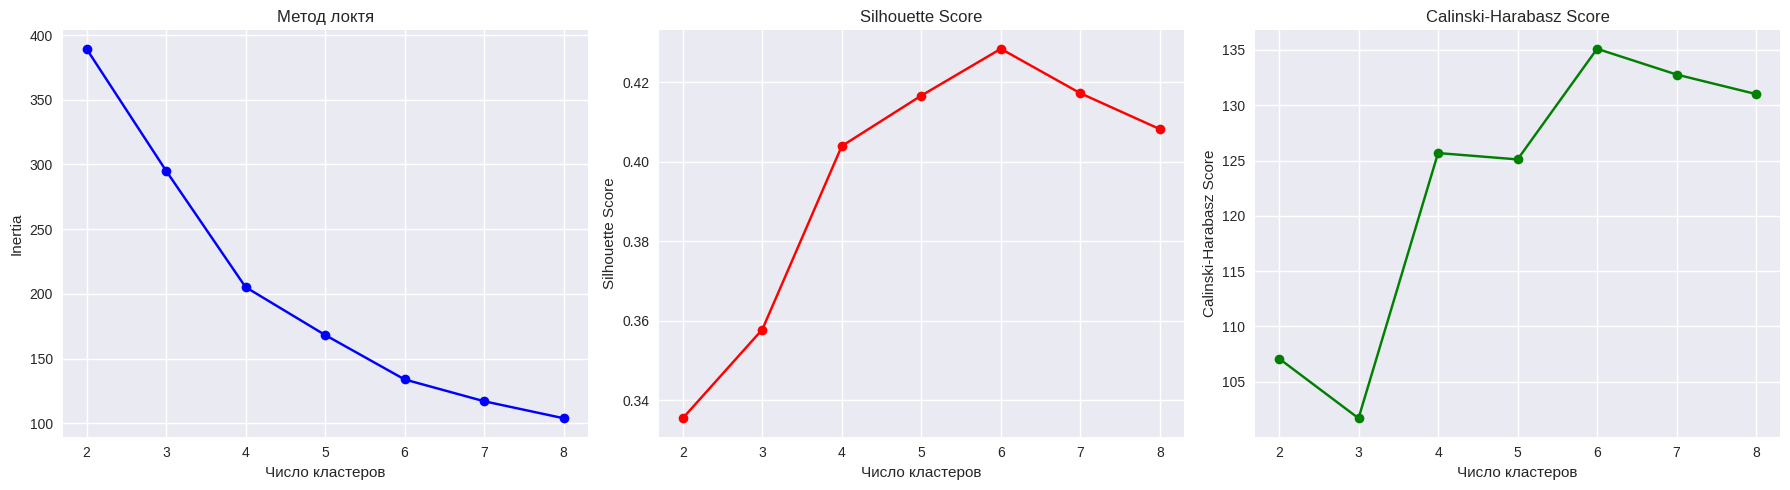

🎯 Рекомендуемое число кластеров: 6

🚀 ЗАПУСК K-MEANS С 6 КЛАСТЕРАМИ...

🎨 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ...


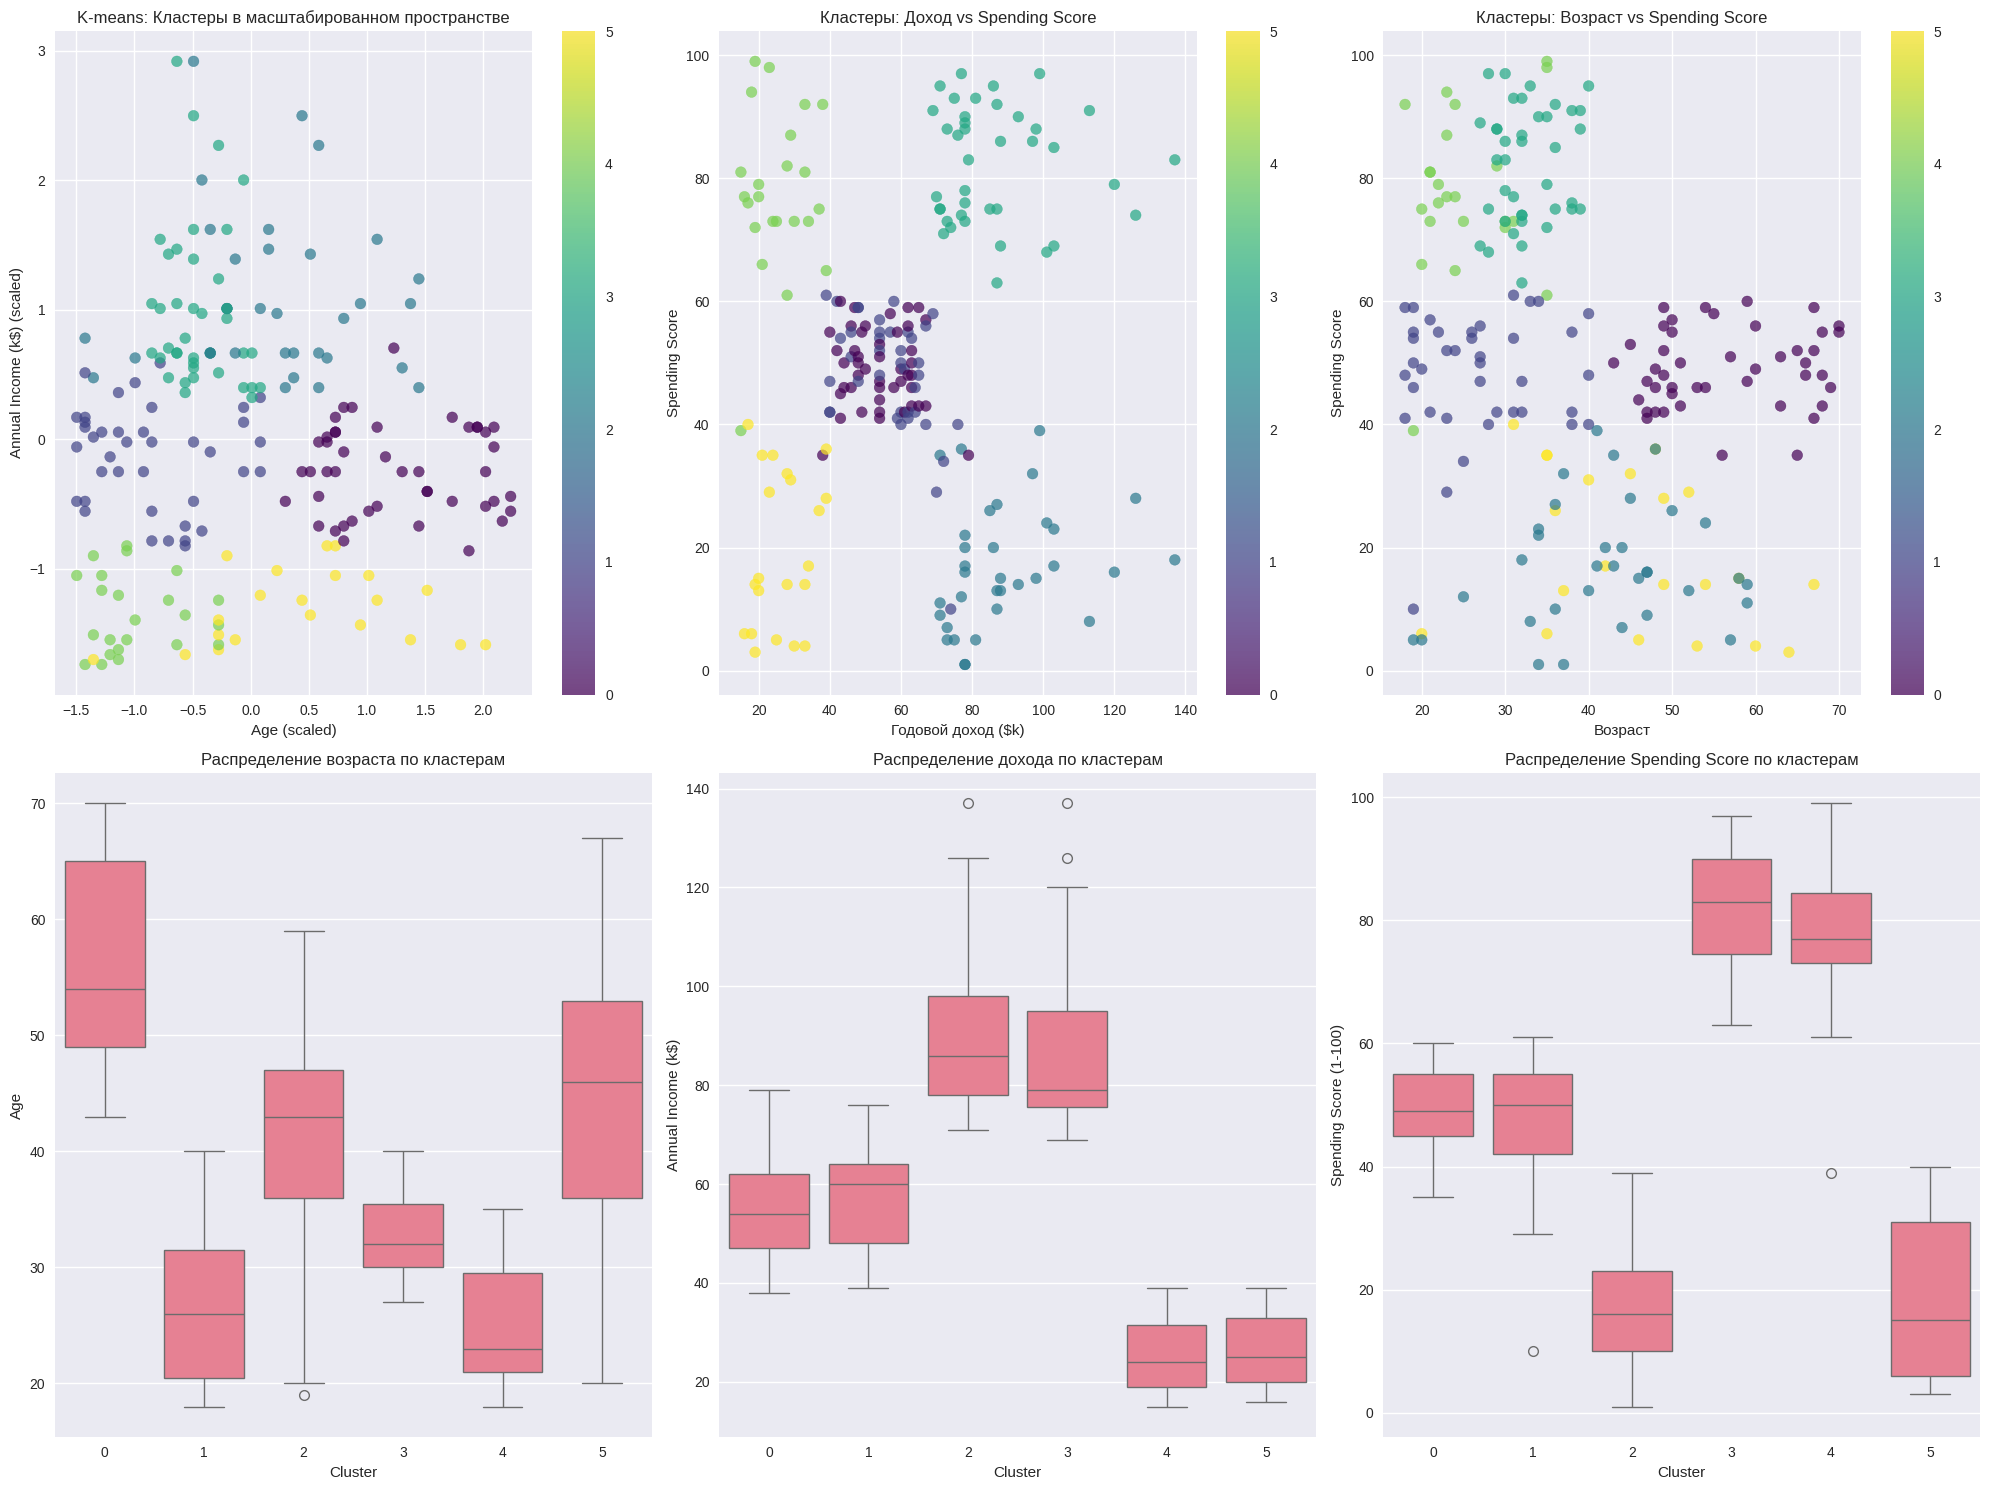

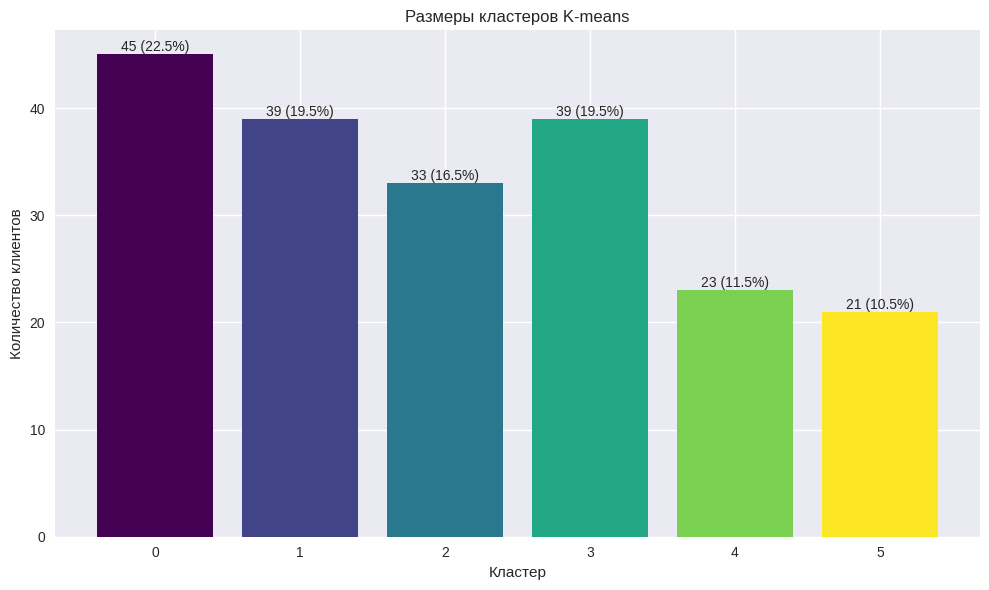


📊 АНАЛИЗ КЛАСТЕРОВ...

📊 ДЕТАЛЬНЫЙ АНАЛИЗ K-MEANS КЛАСТЕРОВ
🔢 Общее количество клиентов: 200
🎯 Количество кластеров: 6
📈 Метрики качества кластеризации:
   • Silhouette Score: 0.4284
   • Calinski-Harabasz Index: 135.1021
   • Davies-Bouldin Index: 0.8254

👤 ПРОФИЛИ КЛАСТЕРОВ:
--------------------------------------------------------------------------------

🏷️ Кластер 0:
   👥 Размер: 45 клиентов (22.5%)
   📊 Характеристики:
      • Age: 56.3 ± 8.5
      • Annual Income (k$): 54.3 ± 9.0
      • Spending Score (1-100): 49.1 ± 6.3
   👫 Распределение по полу:
      • Female: 26 клиентов (57.8%)
      • Male: 19 клиентов (42.2%)

🏷️ Кластер 1:
   👥 Размер: 39 клиентов (19.5%)
   📊 Характеристики:
      • Age: 26.8 ± 7.1
      • Annual Income (k$): 57.1 ± 10.2
      • Spending Score (1-100): 48.1 ± 10.0
   👫 Распределение по полу:
      • Female: 25 клиентов (64.1%)
      • Male: 14 клиентов (35.9%)

🏷️ Кластер 2:
   👥 Размер: 33 клиентов (16.5%)
   📊 Характеристики:
      • Age: 41.9 ± 10.

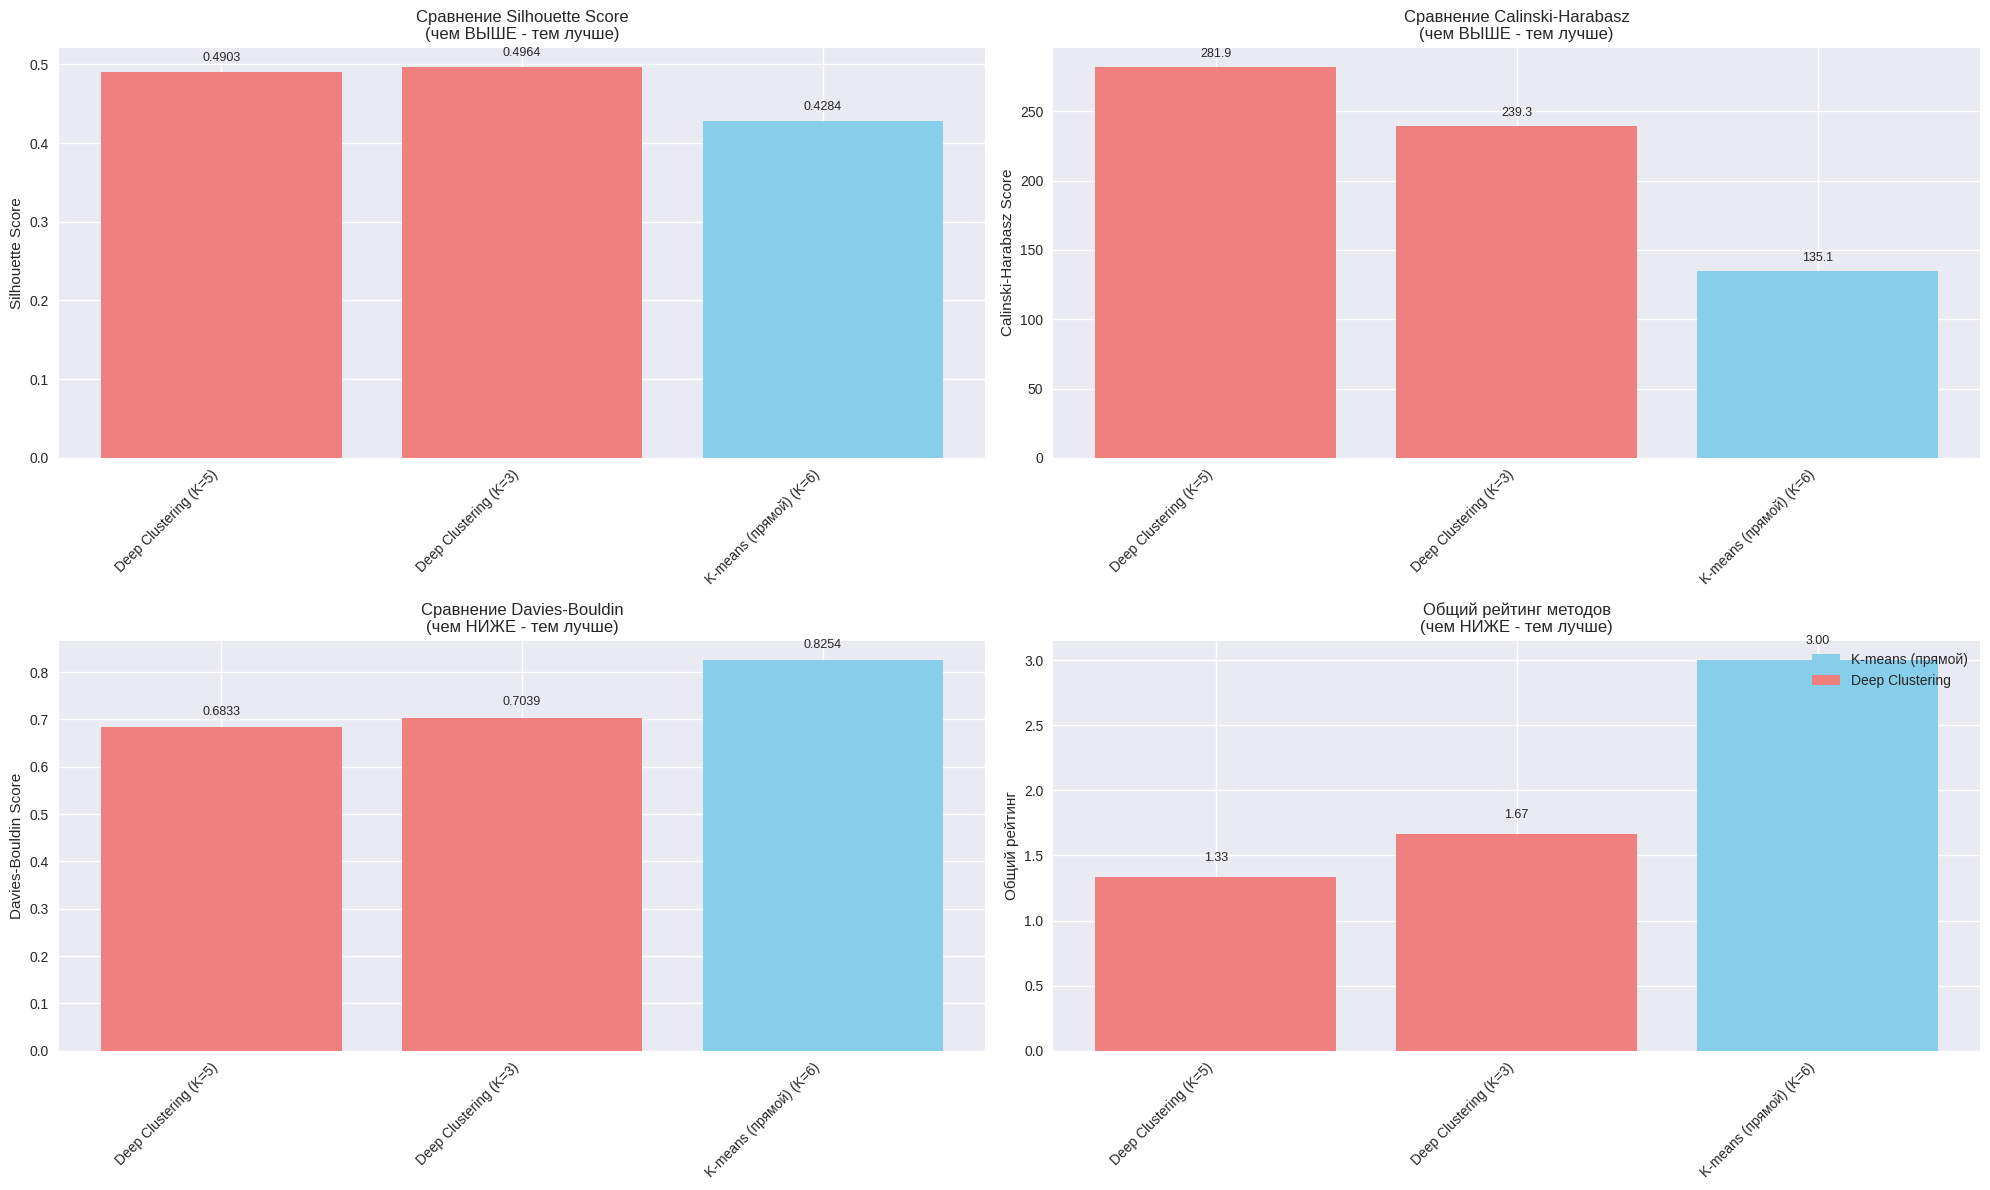


📋 ИТОГОВЫЕ ВЫВОДЫ:
🎯 ЛУЧШИЙ ВАРИАНТ: Deep Clustering (K=5)
📊 Метрики: Silhouette=0.4903, Calinski-Harabasz=281.9, Davies-Bouldin=0.6833


In [57]:
# Загрузка данных
print("📁 Загрузка данных...")
df = pd.read_csv('/content/Mall_Customers.csv')

# Основные признаки для кластеризации
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Запуск K-means кластеризации
print("🚀 ЗАПУСК K-MEANS КЛАСТЕРИЗАЦИИ ДЛЯ СРАВНЕНИЯ")
df_kmeans, kmeans_model, kmeans_silhouette, kmeans_calinski, kmeans_davies, kmeans_k = kmeans_clustering_analysis(
        df, features=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], max_k=8
    )

# Запуск детального сравнения
print("🔍 ЗАПУСК ДЕТАЛЬНОГО СРАВНЕНИЯ ВСЕХ МЕТОДОВ")

# Подготовка данных для K-means
kmeans_results = (kmeans_silhouette, kmeans_calinski, kmeans_davies, kmeans_k)

# Запуск детального сравнения
detailed_comparison = compare_clustering_methods_detailed(
    kmeans_results,
    results,
    method_names=['K-means (прямой)', 'Deep Clustering']
)

# Дополнительный анализ
print("\n📋 ИТОГОВЫЕ ВЫВОДЫ:")
print("=" * 60)

best_method = detailed_comparison.iloc[0]
print(f"🎯 ЛУЧШИЙ ВАРИАНТ: {best_method['Метод']}")
print(f"📊 Метрики: Silhouette={best_method['Silhouette']:.4f}, "
      f"Calinski-Harabasz={best_method['Calinski-Harabasz']:.1f}, "
      f"Davies-Bouldin={best_method['Davies-Bouldin']:.4f}")

# Итог

Мы провели кластеризацию малого датасета на 200 записей с помощью простого автокодировщика, использовав его энкодер для сжатия данных и выявления базовых закономерностей в датасете. После сжатия использовался классический K-mean к латентному представлению и созданы графики кластеризации для наглядного представления разбиения.

Во второй части задания был использован классический алгоритм кластеризации, но уже ко всему датасету без какой либо предварительной обработки и так же представлены графические результаты.

Третья часть работы сравнивает метрики, полученные при обработке НС и классическим способом с выводом лучшего результата из полученных.

Во всех пунктах работы используется визуализация для анализа представленных кластеров в различных сочетаниях, что должно упростить интерпретацию и постановку бизнес-задач.

Дополнительно - в данном случае использовался крайне малый датасет. Для НС этого размера данных оказалось достаточно для переобучения, что требует дополнительной регуляризации, а так же упрощения самой архитектуры автокодировщика.

Так же для воспроизводимости результатов требуется фиксация сидов, иначе при повторном запуске обучения будут появлятся отличные от предыдущих результаты - причина в отличиях начальных состояний при инициализации. В случае исследований и поиска лучших результатов это может помочь, но для постоянного использования результат должен быть повторяемым с тем же исходом.